In [1]:
import numpy as np
import scipy
import scipy.io
import matplotlib.pyplot as plt

In [30]:
def FIRFilter(taps, x):
    y=np.zeros_like(x)
    # for n in range(taps.shape[-1]):
    #     y[n]=x[n]
    for n in range(x.shape[-1]):
        for i in range(min(n+1, taps.shape[-1])):
            y[n]+=taps[i]*x[n-i]
    return y

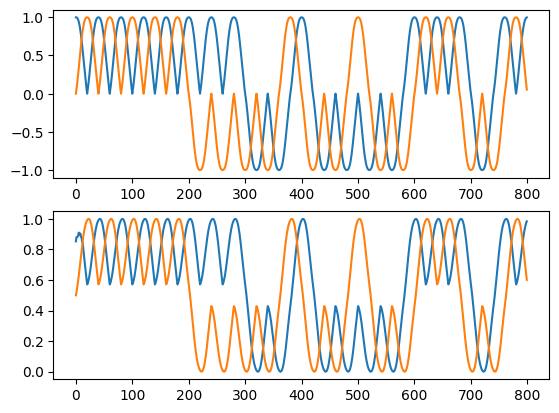

In [35]:
preamble_load = scipy.io.loadmat('./preamble')['preamble']
preamble_real = np.real(preamble_load).squeeze()
preamble_imag = -np.imag(preamble_load).squeeze()
preamble = 1*preamble_real+1j*preamble_imag

taps=np.zeros((13,))
taps[0]=1
deviations=np.random.rand(13,)/10
taps+=deviations
y_real=FIRFilter(taps, preamble_real)
y_imag=FIRFilter(taps, preamble_imag)
y=np.zeros((2,800))
y[0]=y_real
y[1]=y_imag
y=(y-y.min())/(y.max()-y.min())

plt.subplot(211)
plt.plot(preamble_real)
plt.plot(preamble_imag)

plt.subplot(212)
plt.plot(y[0])
plt.plot(y[1])